In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from tensorflow.keras.models import Sequential, model_from_json
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("gen_data3.pkl")


In [3]:
json_file = open('modelJ.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelJ.h5")
adam = Adam(lr=0.0001)
loaded_model.compile(optimizer=adam, loss='MSE')


Metal device set to: Apple M2 Max


2023-02-24 14:58:43.104415: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-24 14:58:43.104433: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/anrunw/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
score = loaded_model(df)

In [5]:
df ['tc'] = score

In [6]:
names = np.load('Data/names.npy', allow_pickle=True)

In [7]:
columns = np.load('gitCol.npy', allow_pickle=True)

In [8]:
elements = df.loc[:,'H':'Bi']

In [9]:
colEl = list(elements.columns)

In [10]:
elementA = np.asarray(elements)

In [11]:
df - df['tc'] >= 10

,0,1,2,3,4,5,6,7,8,9,...,wtd_range_Valence,wtd_range_atomic_radius,wtd_range_fie,wtd_std_Density,wtd_std_ElectronAffinity,wtd_std_FusionHeat,wtd_std_ThermalConductivity,wtd_std_Valence,wtd_std_atomic_radius,wtd_std_fie
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
num = 0 
supList = []
for x in elementA:
    eNum = 0
    if np.sum(x) != 0 :
        z = x/(np.sum(x))
    supList.append('')
    for y in z:

        if y != 0:
            supList[num]= supList[num] + str(colEl[eNum])+str(round(y,4))
        eNum = eNum + 1
    num = num+1

In [16]:
num = 0
highTemp = []
for x in supList:

    highTemp.append(x + ' tc = ' + str(df['tc'][num]))
    num=num+1


In [17]:
for x in set(highTemp):
    print(x)

Ba1.0 tc = 1.2765357
N0.1821Mn0.8179 tc = 1.3856528
Ba1.0 tc = 1.3515418
Mg0.1104P0.235Se0.086Rh0.1148Ce0.0025Pr0.4053Tm0.046 tc = 1.071768
Na0.2022Mg0.0746Y0.2436Rh0.1753Tm0.2722Os0.0321 tc = 1.5863049
Hg1.0 tc = 1.382685
Pr1.0 tc = 1.2037513
K0.0678Nb0.0497Te0.4279Pb0.4545 tc = 1.3890793
Eu1.0 tc = 1.3945439
N1.0 tc = 1.5827649
Se1.0 tc = 1.3895805
Fe1.0 tc = 1.3920863
Mo1.0 tc = 1.3834293
Co1.0 tc = 1.3933017
Ta1.0 tc = 1.2906725
H1.0 tc = 1.4912565
Na0.5133Pr0.4867 tc = 1.458875
Cu1.0 tc = 1.3894379
La0.6244Er0.0187Pt0.1702Pb0.1867 tc = 1.3810785
Sc1.0 tc = 1.2825296
He0.8329Bi0.1671 tc = 0.0
N0.3226Eu0.6774 tc = 1.6951501
Cd0.047La0.953 tc = 1.4164045
Pd0.0077Eu0.9923 tc = 1.3764417
Nd1.0 tc = 1.7968624
P1.0 tc = 1.1024773
S1.0 tc = 1.3433287
Ta1.0 tc = 1.2259777
Mo1.0 tc = 1.2412584
Ba1.0 tc = 1.3620808
Sm1.0 tc = 1.211261
Sn1.0 tc = 1.4184983
Mn1.0 tc = 3.580375
Os1.0 tc = 1.392483
He0.2856N0.7144 tc = 0.0
La0.3562Ta0.5652Os0.0786 tc = 1.30635
N1.0 tc = 1.3776371
S1.0 tc = 1.372

In [ ]:
np.save('highTempGit1', set(highTemp))

In [ ]:
df ['tc'] = score

AttributeError: module 'matplotlib.pyplot' has no attribute 'xrange'

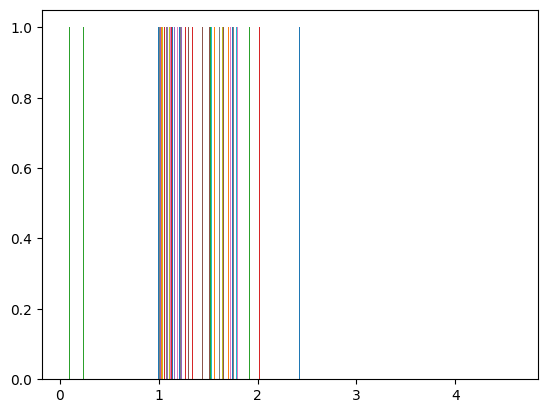

In [24]:
plt.hist(score, bins = 10)
plt.xrange(range(0,3))